# Проект: Построение дашбордов в Tableau

В этом проекте создадим дашборд на основе данных о конференциях TED. Проведем исследование истории TED-конференций с помощью Tableau.

Файлы tableau_project_data_1.csv, tableau_project_data_2.csv, tableau_project_data_3.csv хранят данные выступлений. У них одинаковая структура:
<br>
talk_id — идентификатор выступления;
<br>
url — ссылка на запись выступления;
<br>
title — название выступления;
<br>
description — краткое описание;
<br>
film_date — дата записи выступления;
<br>
duration — длительность в секундах;
<br>
views — количество просмотров;
<br>
main_tag — основная категория, к которой относится выступление;
<br>
speaker_id — уникальный идентификатор автора выступления;
<br>
laughter_count — количество раз, когда аудитория смеялась в ходе выступления;
<br>
applause_count — количество раз, когда аудитория аплодировала в ходе выступления;
<br>
language — язык, на котором велось выступление;
<br>
event_id — уникальный идентификатор конференции.
<br>
Файл tableau_project_event_dict.csv — справочник конференций. Описание таблицы:
<br>
conf_id — уникальный идентификатор конференции;
<br>
event — название конференции;
<br>
country — страна проведения конференции.
<br>
Файл tableau_project_speakers_dict.csv — справочник авторов выступления. Описание таблицы:
<br>
author_id — уникальный идентификатор автора выступления;
<br>
speaker_name — имя автора;
<br>
speaker_occupation — профессиональная область автора;
<br>
speaker_description — описание профессиональной деятельности автора.

Шаг 1. Загрузим и изучим данные.
Загрузим данные в Tableau.

Шаг 2. Построим дашборд «История выступлений»

Шаг 3. Созданим дашборд «Тематики выступлений»

Шаг 4. Созданим дашборд «Авторы выступлений»

Шаг 5. Созданим дашборд «Показатели иподдержки выступающих по странам»

Шаг 6. Создание презентации


### Загрузим и изучим данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    df1 = pd.read_csv(r'C:\Users\dimak\Downloads\tableau_project_data_1.csv')
    df2 = pd.read_csv(r'C:\Users\dimak\Downloads\tableau_project_data_2.csv')
    df3 = pd.read_csv(r'C:\Users\dimak\Downloads\tableau_project_data_3.csv')
except:
    df1 = pd.read_csv('/datasets/tableau_project_data_1.csv')
    df2 = pd.read_csv('/datasets/tableau_project_data_2.csv')
    df3 = pd.read_csv('/datasets/tableau_project_data_3.csv')

Объеденим датасеты

In [3]:
df = pd.concat([df1,df2,df3])

In [4]:
df.to_csv(r'C:\Users\dimak\Downloads\tableau_project_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 1151
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         3456 non-null   int64  
 1   url             3456 non-null   object 
 2   title           3456 non-null   object 
 3   description     3456 non-null   object 
 4   film_date       3456 non-null   object 
 5   duration        3456 non-null   int64  
 6   views           3456 non-null   int64  
 7   main_tag        3454 non-null   object 
 8   speaker_id      3456 non-null   int64  
 9   laughter_count  3139 non-null   float64
 10  applause_count  3139 non-null   float64
 11  language        3456 non-null   object 
 12  event_id        3456 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 378.0+ KB


Всего 13 колонок и 3456 рядов

In [6]:
df.head(10)

,talk_id,url,title,description,film_date,duration,views,main_tag,speaker_id,laughter_count,applause_count,language,event_id
0,84216,https://www.ted.com/talks/christina_costa_how_...,How gratitude rewires your brain,When a psychologist who studies well-being end...,2021-03-27,600,718724,health,6625,0.0,0.0,English,309
1,66033,https://www.ted.com/talks/caitlin_holman_how_g...,How game design can help schooling,The world is changing rapidly but models of de...,2017-02-08,1043,46441,education,53443,NaN,NaN,English,309
2,21933,https://www.ted.com/talks/terri_conley_we_need...,We need to rethink casual sex,Social psychologist and sex researcher Terri C...,2016-04-01,1091,273438,society,5107,0.0,0.0,English,309
3,2022,https://www.ted.com/talks/anne_curzan_what_mak...,"What makes a word ""real""?","One could argue that slang words like ‘hangry,...",2014-03-15,1033,2031550,culture,1938,12.0,4.0,English,309
4,83538,https://www.ted.com/talks/jane_walsh_the_rise_...,The rise of predatory scams -- and how to prev...,"Questionable phone calls, concerning emails, h...",2021-06-26,833,802109,technology,6606,0.0,0.0,English,233
5,81821,https://www.ted.com/talks/rebecca_galemba_how_...,How employers steal from workers -- and get aw...,"When you work, you expect to be paid for it. E...",2021-03-20,578,1199939,economics,6540,0.0,0.0,English,233
6,80115,https://www.ted.com/talks/kevin_j_krizek_how_c...,How COVID-19 reshaped US cities,The pandemic spurred an unprecedented reclamat...,2021-03-20,581,1306282,cities,6484,NaN,NaN,English,233
7,74616,https://www.ted.com/talks/katherine_m_gehl_us_...,US politics isn't broken. It's fixed,"The ""broken"" US political system is actually w...",2020-12-05,1009,1264323,social change,6306,0.0,0.0,English,233
8,74282,https://www.ted.com/talks/amber_mcreynolds_an_...,An election system that puts voters (not polit...,From hours-long lines and limited polling loca...,2020-08-29,619,1288197,society,6301,0.0,0.0,English,233
9,75168,https://www.ted.com/talks/joan_c_williams_why_...,Why corporate diversity programs fail -- and h...,Companies in the US spend billions of dollars ...,2020-12-05,883,1252694,business,6314,0.0,0.0,English,233


In [7]:
df['main_tag'].value_counts()

science             729
technology          613
culture             462
society             274
global issues       203
                   ... 
public health         1
gender                1
disability            1
money                 1
medical research      1
Name: main_tag, Length: 80, dtype: int64

In [8]:
try:
    df1 = pd.read_csv(r'C:\Users\dimak\Downloads\tableau_project_event_dict.csv')
    df2 = pd.read_csv(r'C:\Users\dimak\Downloads\tableau_project_speakers_dict.csv')
except:
    df1 = pd.read_csv('/datasets/tableau_project_event_dict.csv')
    df2 = pd.read_csv('/datasets/tableau_project_speakers_dict.csv')

In [9]:
 df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   conf_id  327 non-null    int64 
 1   event    327 non-null    object
 2   country  327 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.8+ KB


Всего 3 колонки и 327 рядов

In [10]:
 df1.head()

,conf_id,event,country
0,0,Arbejdsglaede Live,United States
1,1,Business Innovation Factory,United States
2,2,Chautauqua Institution,United States
3,3,DLD 2007,United States
4,4,EG 2007,United States


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2971 entries, 0 to 2970
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   author_id            2971 non-null   int64 
 1   speaker_name         2971 non-null   object
 2   speaker_occupation   2971 non-null   object
 3   speaker_description  2958 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.0+ KB


Всего 4 колонки и 2971 ряд

In [12]:
df2.head(10)

,author_id,speaker_name,speaker_occupation,speaker_description
0,2,Al Gore,Climate advocate,Nobel Laureate Al Gore focused the world's att...
1,3,Amy Smith,inventor,"Amy Smith designs cheap, practical fixes for t..."
2,4,Ashraf Ghani,President of Afghanistan,Afghanistan's president Ashraf Ghani has initi...
3,5,Burt Rutan,Aircraft engineer,"In 2004, legendary spacecraft designer Burt Ru..."
4,6,Chris Bangle,Car designer,Car design is a ubiquitous but often overlooke...
5,7,Craig Venter,Biologist,"In 2001, Craig Venter made headlines for seque..."
6,8,David Pogue,Technology columnist,David Pogue is the personal technology columni...
7,9,David Rockwell,Architect,Architect David Rockwell draws on his love of ...
8,10,Dean Kamen,Inventor,Dean Kamen landed in the limelight with the Se...
9,11,Dean Ornish,Physician,Dean Ornish is a clinical professor at UCSF an...


Изучим, как количество конференций распределено по времени. Определим год, после которого количество выступлений скачкообразно выросло.

In [13]:
df['film_date'] = pd.to_datetime(df['film_date'])

In [14]:
df['year'] = df['film_date'].dt.year

In [15]:
dfdf = df.pivot_table(index=['year'], values=['event_id'], aggfunc = 'count')

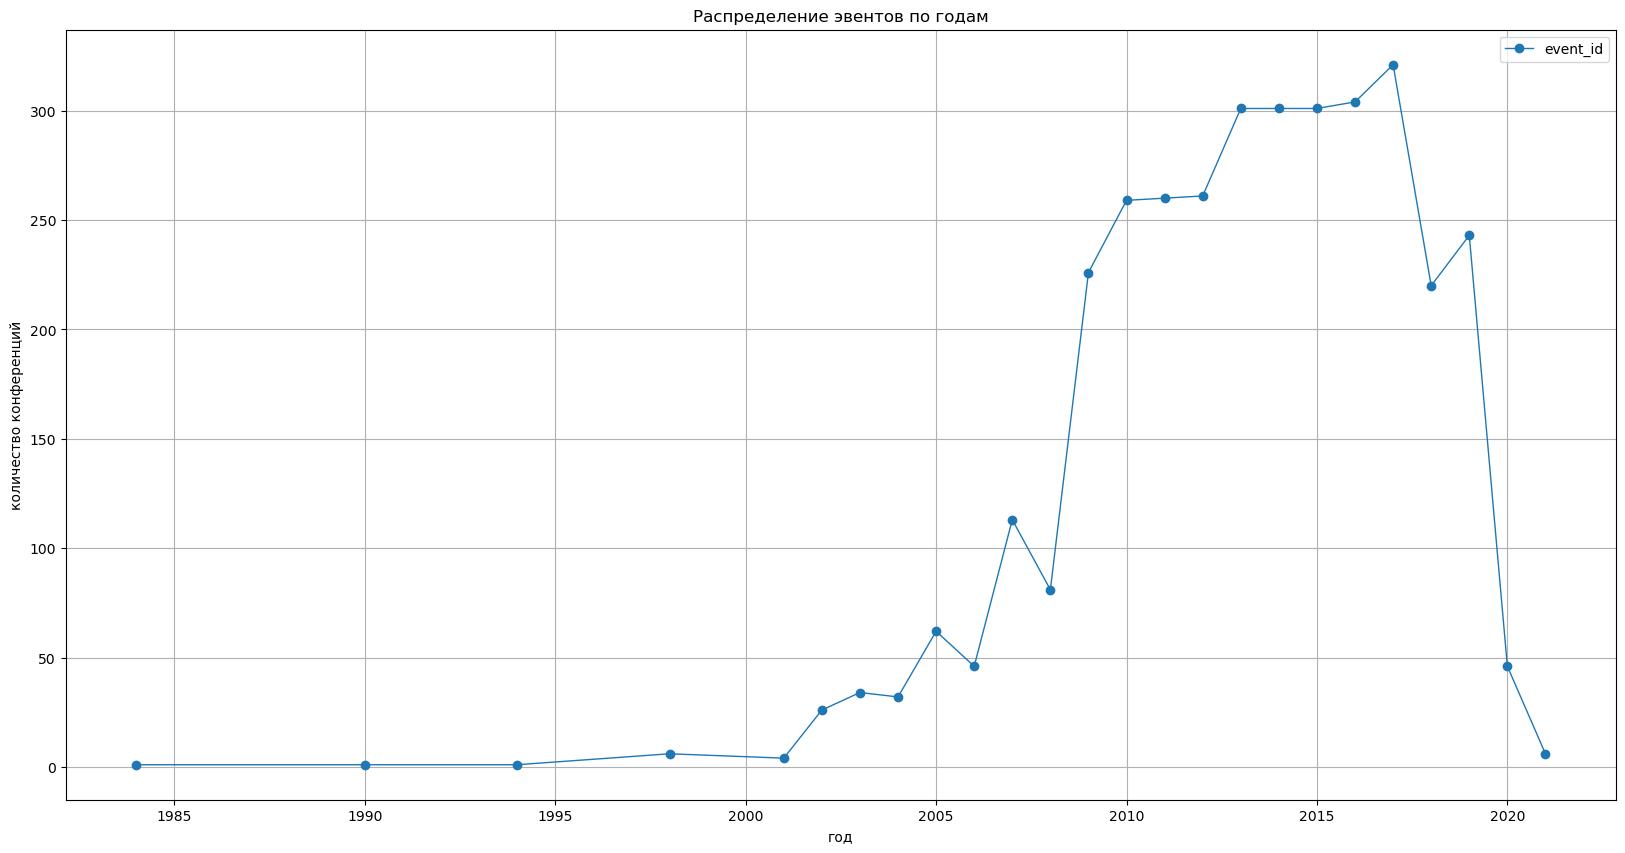

In [16]:
dfdf.plot(figsize=(20,10),marker='o', grid=True, linewidth=1, title='Распределение эвентов по годам')
plt.xlabel('год')
plt.ylabel('количество конференций')
plt.show()

После 2008 года количество выступлений скачкообразно выросло.

Проведем исследование и создадим дашборд в Tableau

Ссылка на дашборд.

https://public.tableau.com/views/Yandex_Project_17050771604180/Tableau?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link